In [89]:
import sh
import os
import sys
import random 
import numpy as np
from matplotlib import pyplot as plt

if '/opt/ros/kinetic/lib/python2.7/dist-packages' in sys.path:
    sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
# Remove the above line, if you don't have conflicts with ROS-Python
import cv2

# Setting up the directories for use
# Currently using the Stanford provided annotations
data_path = '/media/ayush/DATA1/Data/stanford_campus_dataset/'

images_path = os.path.join(data_path, "sdd/JPEGImages")
labels_path = os.path.join(data_path, "sdd/Annotations")
sets_path = os.path.join(data_path, "sdd/ImageSets/Main")

train_list_file = os.path.join(sets_path, "train.txt")
test_list_file = os.path.join(sets_path, "test.txt")
val_list_file = os.path.join(sets_path, "val.txt")
trainval_list_file = os.path.join(sets_path, "trainval.txt")

print("Going to load images from: {}".format(images_path))
print("Going to load annotations from: {}".format(labels_path))

Going to load images from: /media/ayush/DATA1/Data/stanford_campus_dataset/sdd/JPEGImages
Going to load annotations from: /media/ayush/DATA1/Data/stanford_campus_dataset/sdd/Annotations


In [9]:
TrainFileReader = open(train_list_file, "r")
train_list = (TrainFileReader.read()).split()
print("Number Of Training Images loaded: {}".format(len(train_list)))
TrainFileReader.close()

TestFileReader = open(test_list_file, "r")
test_list = (TestFileReader.read()).split()
print("Number Of Training Images loaded: {}".format(len(test_list)))
TestFileReader.close()

TrainValFileReader = open(trainval_list_file, "r")
train_val_list = (TrainValFileReader.read()).split()
print("Number Of Training Images loaded: {}".format(len(train_val_list)))
TrainValFileReader.close()

ValFileReader = open(val_list_file, "r")
val_list = (ValFileReader.read()).split()
print("Number Of Training Images loaded: {}".format(len(val_list)))
ValFileReader.close()

Number Of Training Images loaded: 27630
Number Of Training Images loaded: 15991
Number Of Training Images loaded: 35661
Number Of Training Images loaded: 8031


In [78]:
def create(flip=1, crop=0.9, angle=10, color=0.05):
    image_name = random.choice(train_list)
    image_path = os.path.join(images_path, image_name + ".jpg")
    print(image_path)
    label_path = os.path.join(labels_path, image_name)
    
    # Loading the image using OpenCV
    image = cv2.imread(image_path).astype(np.float)
    h, w, _ = image.shape
    print("Image Shape: {}".format(image.shape))
    
    plt.imshow((image * 255).astype(np.uint8))    
    plt.title('Loaded Image')
    plt.show()
    
    AnnotationReader = open(label_path + ".xml")
    annotation_content = AnnotationReader.read()
    print(annotation_content)
    AnnotationReader.close()

/media/ayush/DATA1/Data/stanford_campus_dataset/sdd/JPEGImages/bookstore_video1_6886.jpg
Image Shape: (1079, 1422, 3)


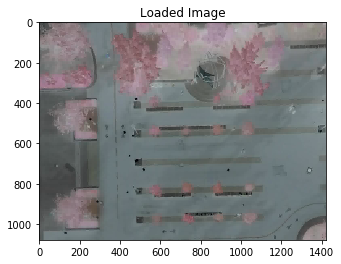

<annotation><folder>sdd</folder><source><database>Stanford Drone Dataset</database></source><size><width>1422</width><height>1079</height><depth>3</depth></size><segmented>0</segmented><filename>bookstore_video1_6886</filename></annotation>


In [79]:
create()

In [90]:
import xml.etree.ElementTree as ET

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def main():
    for folder in ['train','test']:
        image_path = os.path.join(os.getcwd(), ('images/' + folder))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv(('images/' + folder + '_labels.csv'), index=None)
        print('Successfully converted xml to csv.')



FileNotFoundError: [Errno 2] No such file or directory: '/media/ayush/DATA1/Data/stanford_campus_dataset/sdd/Annotationsbookstore_video1_1.xml'